# 시계열 데이터 이해 (추세, 주기성 등)

https://www.youtube.com/playlist?list=PLpIPLT0Pf7IqSuMx237SHRdLd5ZA4AQwd

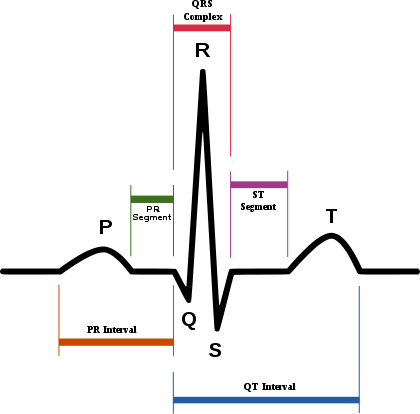

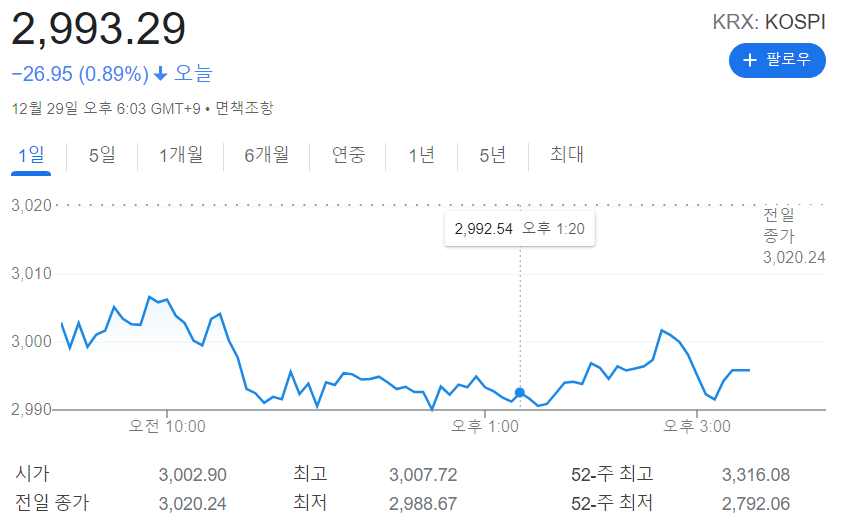

* **추세(Trend)**란 장기적으로 증가하거나, 감소하는 경향성이 존재하는 것을 의미합니다.
* **계절성(Seasonality)**이란 계절적 요인의 영향을 받아 1년, 혹은 일정 기간 안에 반복적으로 나타나는 패턴을 의미합니다.
* **주기성(Cycle)**이란 정해지지 않은 빈도, 기간으로 일어나는 상승 혹은 하락을 의미합니다.

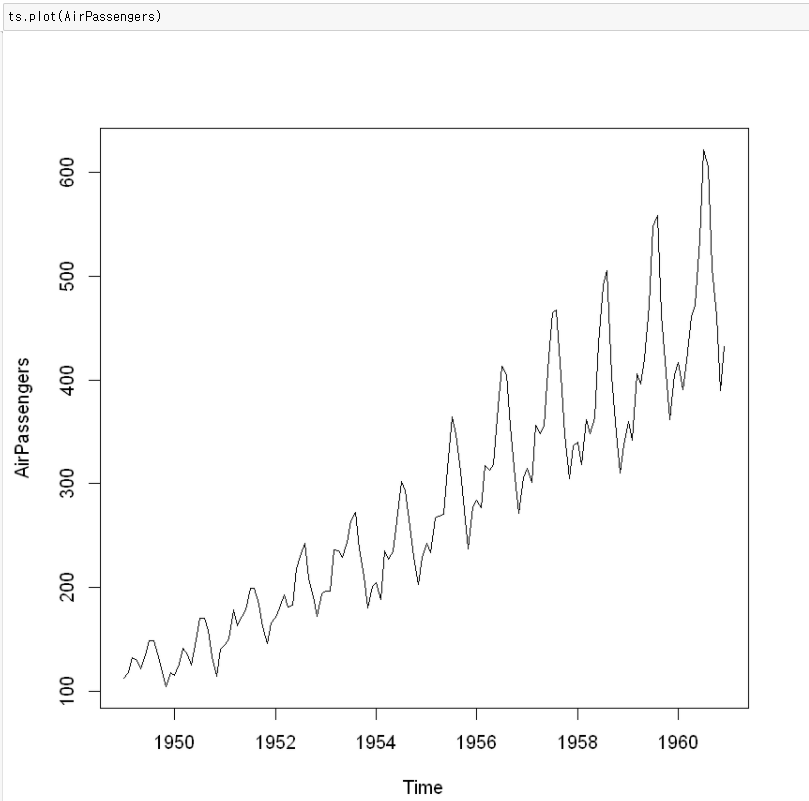

* 시계열 분해(Time series decomposition)

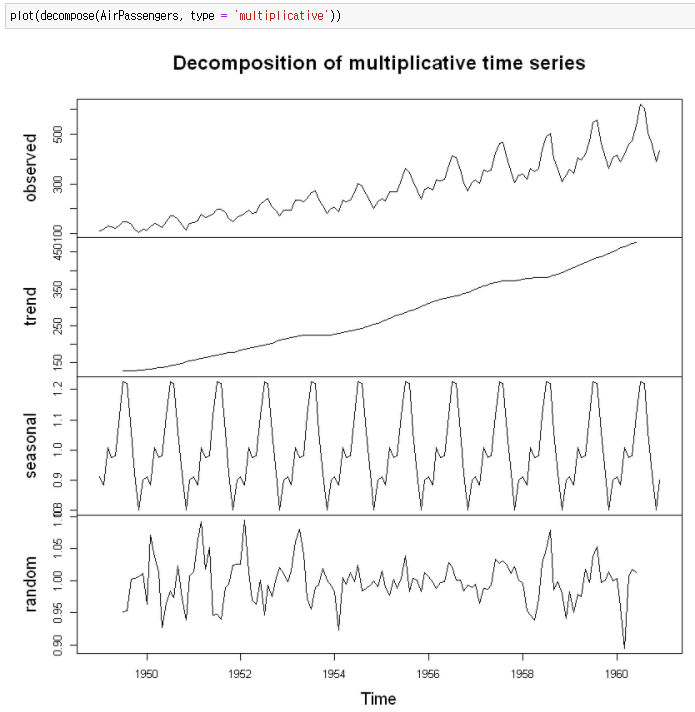

https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
df["Month"] = pd.to_datetime(df["Month"])
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
df = df.set_index('Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

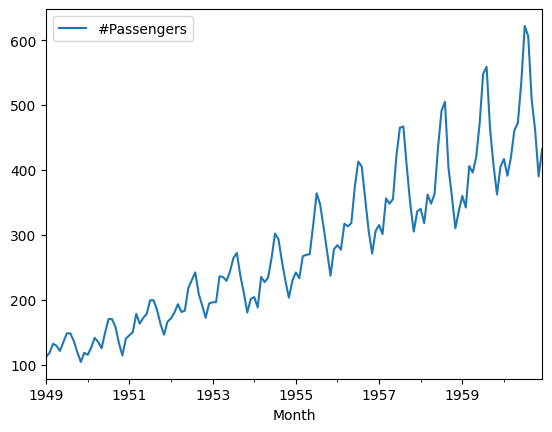

In [4]:
df.plot()

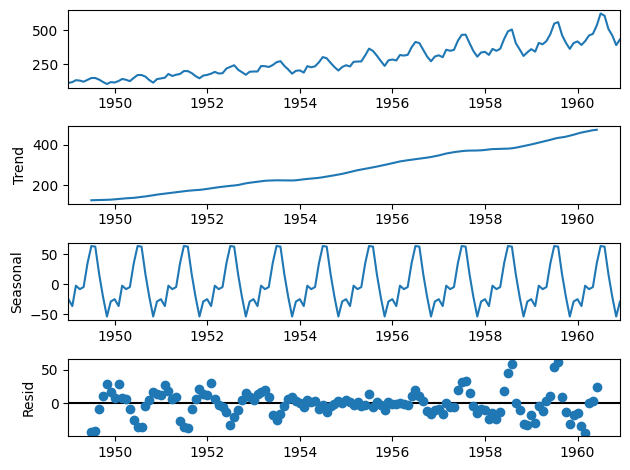

In [5]:
seasonal_decompose(df, model='additive').plot()
plt.show()

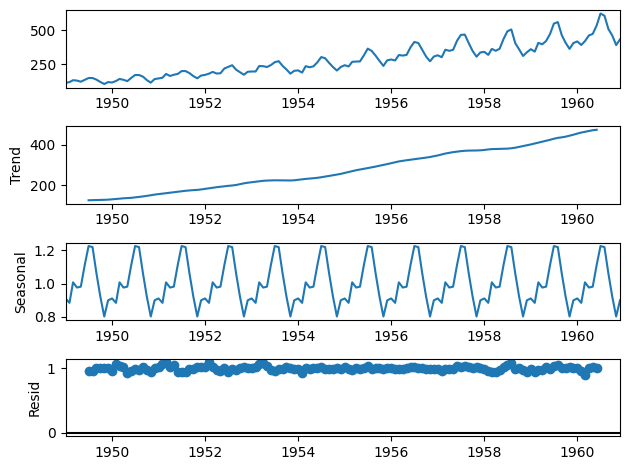

In [6]:
seasonal_decompose(df, model='multiplicative').plot()
plt.show()

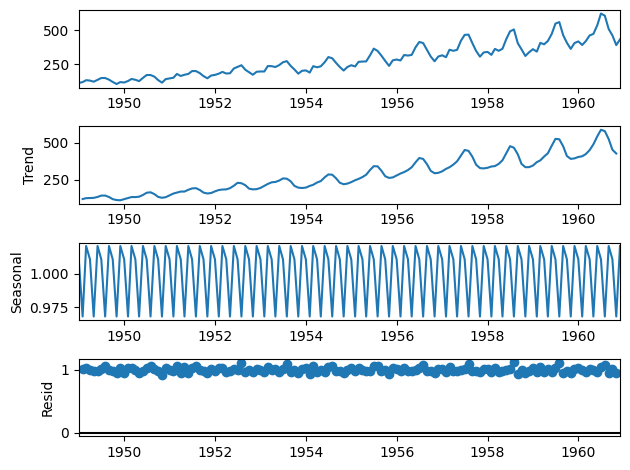

In [7]:
seasonal_decompose(df, model='multiplicative', period=3).plot()
plt.show()

# 시계열 데이터 전처리 (DatetimeIndex)

https://datascienceschool.net/01%20python/04.08%20%EC%8B%9C%EA%B3%84%EC%97%B4%20%EC%9E%90%EB%A3%8C%20%EB%8B%A4%EB%A3%A8%EA%B8%B0.html

## DatetimeIndex 인덱스

In [8]:
date_str = ["2018, 1, 1", "2018, 1, 4", "2018, 1, 5", "2018, 1, 6"]
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [9]:
np.random.seed(0)
s = pd.Series(np.random.randn(4), index=idx)
s

2018-01-01    1.764052
2018-01-04    0.400157
2018-01-05    0.978738
2018-01-06    2.240893
dtype: float64

In [10]:
pd.date_range("2018-4-1", "2018-4-30")

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [11]:
pd.date_range(start="2018-4-1", periods=20)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20'],
              dtype='datetime64[ns]', freq='D')

In [12]:
pd.date_range("2018-4-1", "2018-4-30", freq="B")

DatetimeIndex(['2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13', '2018-04-16', '2018-04-17',
               '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-23',
               '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
               '2018-04-30'],
              dtype='datetime64[ns]', freq='B')

## shift 연산

In [13]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index=pd.date_range(
    "2018-1-1", periods=4, freq="M"))
ts

2018-01-31    1.764052
2018-02-28    0.400157
2018-03-31    0.978738
2018-04-30    2.240893
Freq: M, dtype: float64

In [14]:
ts.shift(1)

2018-01-31         NaN
2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
Freq: M, dtype: float64

In [15]:
ts.shift(-1)

2018-01-31    0.400157
2018-02-28    0.978738
2018-03-31    2.240893
2018-04-30         NaN
Freq: M, dtype: float64

In [16]:
ts.shift(1, freq="M")

2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
2018-05-31    2.240893
Freq: M, dtype: float64

In [17]:
ts.shift(1, freq="W")

2018-02-04    1.764052
2018-03-04    0.400157
2018-04-01    0.978738
2018-05-06    2.240893
dtype: float64

## resample 연산

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

ts = pd.Series(np.random.randn(100), index=pd.date_range(
    "2018-1-1", periods=100, freq="D"))
ts.tail(20)

2018-03-22    1.488252
2018-03-23    1.895889
2018-03-24    1.178780
2018-03-25   -0.179925
2018-03-26   -1.070753
2018-03-27    1.054452
2018-03-28   -0.403177
2018-03-29    1.222445
2018-03-30    0.208275
2018-03-31    0.976639
2018-04-01    0.356366
2018-04-02    0.706573
2018-04-03    0.010500
2018-04-04    1.785870
2018-04-05    0.126912
2018-04-06    0.401989
2018-04-07    1.883151
2018-04-08   -1.347759
2018-04-09   -1.270485
2018-04-10    0.969397
Freq: D, dtype: float64

In [19]:
ts.resample('W').mean()

2018-01-07    0.305776
2018-01-14    0.629064
2018-01-21   -0.006910
2018-01-28    0.277065
2018-02-04   -0.144972
2018-02-11   -0.496299
2018-02-18   -0.474473
2018-02-25   -0.201222
2018-03-04   -0.775142
2018-03-11    0.052868
2018-03-18   -0.450379
2018-03-25    0.601892
2018-04-01    0.334893
2018-04-08    0.509605
2018-04-15   -0.150544
Freq: W-SUN, dtype: float64

In [20]:
ts.resample('M').first()

2018-01-31    1.867558
2018-02-28    0.156349
2018-03-31   -1.726283
2018-04-30    0.356366
Freq: M, dtype: float64

In [21]:
ts = pd.Series(np.random.randn(60), index=pd.date_range(
    "2018-1-1", periods=60, freq="T"))
ts.head(20)


2018-01-01 00:00:00   -1.173123
2018-01-01 00:01:00    1.943621
2018-01-01 00:02:00   -0.413619
2018-01-01 00:03:00   -0.747455
2018-01-01 00:04:00    1.922942
2018-01-01 00:05:00    1.480515
2018-01-01 00:06:00    1.867559
2018-01-01 00:07:00    0.906045
2018-01-01 00:08:00   -0.861226
2018-01-01 00:09:00    1.910065
2018-01-01 00:10:00   -0.268003
2018-01-01 00:11:00    0.802456
2018-01-01 00:12:00    0.947252
2018-01-01 00:13:00   -0.155010
2018-01-01 00:14:00    0.614079
2018-01-01 00:15:00    0.922207
2018-01-01 00:16:00    0.376426
2018-01-01 00:17:00   -1.099401
2018-01-01 00:18:00    0.298238
2018-01-01 00:19:00    1.326386
Freq: T, dtype: float64

In [22]:
ts.resample('10T').sum()

2018-01-01 00:00:00    6.835324
2018-01-01 00:10:00    3.764630
2018-01-01 00:20:00    0.776495
2018-01-01 00:30:00   -0.538336
2018-01-01 00:40:00    1.828234
2018-01-01 00:50:00    0.167957
Freq: 10T, dtype: float64

In [23]:
ts.resample('10T', closed="right").sum()

2017-12-31 23:50:00   -1.173123
2018-01-01 00:00:00    7.740444
2018-01-01 00:10:00    3.338065
2018-01-01 00:20:00    0.835217
2018-01-01 00:30:00    2.480654
2018-01-01 00:40:00   -0.653363
2018-01-01 00:50:00    0.266409
Freq: 10T, dtype: float64

In [24]:
ts.resample('5T').ohlc()

,open,high,low,close
2018-01-01 00:00:00,-1.173123,1.943621,-1.173123,1.922942
2018-01-01 00:05:00,1.480515,1.910065,-0.861226,1.910065
2018-01-01 00:10:00,-0.268003,0.947252,-0.268003,0.614079
2018-01-01 00:15:00,0.922207,1.326386,-1.099401,1.326386
2018-01-01 00:20:00,-0.694568,1.849264,-0.694568,0.672295
2018-01-01 00:25:00,0.407462,0.539249,-0.769916,0.031831
2018-01-01 00:30:00,-0.635846,0.676433,-0.635846,0.396007
2018-01-01 00:35:00,-1.093062,0.635031,-1.491258,0.635031
2018-01-01 00:40:00,2.383145,2.383145,-1.315907,-1.315907
2018-01-01 00:45:00,-0.461585,1.713343,-0.826439,-0.826439


# 시계열 데이터 전처리 (결측치)

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

In [25]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [26]:
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


In [27]:
df.fillna(0)["A"].astype("int")

0    0
1    3
2    0
3    0
Name: A, dtype: int64

In [28]:
df.fillna(method="ffill")

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,4.0,NaN,1.0
3,3.0,3.0,NaN,4.0


In [29]:
df.fillna(method="bfill")

,A,B,C,D
0,3.0,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,3.0,NaN,4.0
3,NaN,3.0,NaN,4.0


## dt 접근자

In [30]:
s = pd.Series(pd.date_range("2020-12-25", periods=100, freq="D"))
s

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
        ...    
95   2021-03-30
96   2021-03-31
97   2021-04-01
98   2021-04-02
99   2021-04-03
Length: 100, dtype: datetime64[ns]

In [31]:
s.dt.year

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
95    2021
96    2021
97    2021
98    2021
99    2021
Length: 100, dtype: int64

In [32]:
s.dt.weekday

0     4
1     5
2     6
3     0
4     1
     ..
95    1
96    2
97    3
98    4
99    5
Length: 100, dtype: int64

In [33]:
s.dt.strftime("%Y년 %m월 %d일")

0     2020년 12월 25일
1     2020년 12월 26일
2     2020년 12월 27일
3     2020년 12월 28일
4     2020년 12월 29일
          ...      
95    2021년 03월 30일
96    2021년 03월 31일
97    2021년 04월 01일
98    2021년 04월 02일
99    2021년 04월 03일
Length: 100, dtype: object

# 시계열 데이터 전처리 (이상치)

In [34]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

In [35]:
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


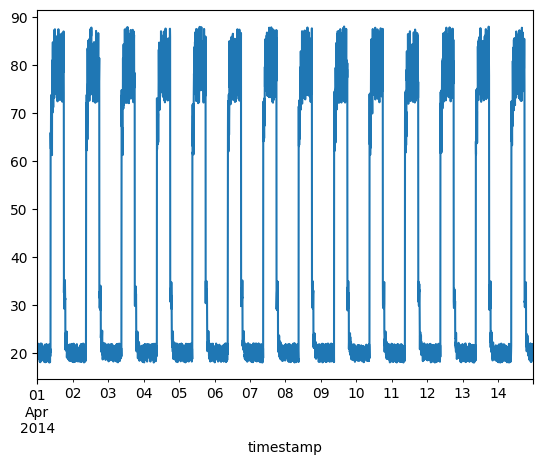

In [36]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.show()

In [37]:
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


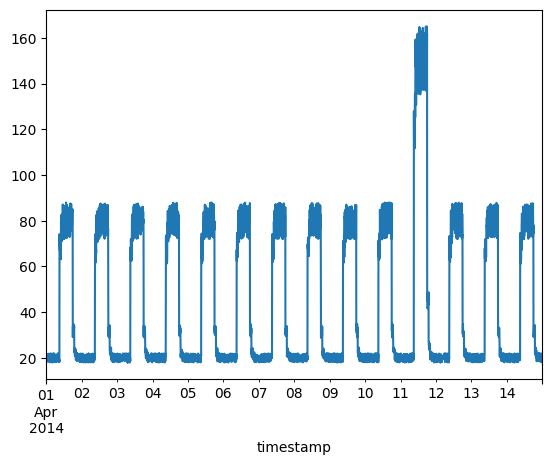

In [38]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()

In [39]:
def std_outlier(df, threshold=3):
    mean = np.mean(df)
    std = np.std(df)
    z_scores = (df - mean) / std
    std_df = df[abs(z_scores) <= threshold]
    return std_df

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


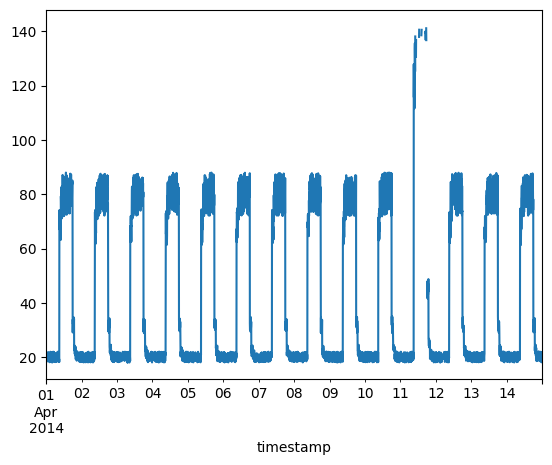

In [40]:
fig, ax = plt.subplots()
std_outlier(df_daily_jumpsup, threshold=3).plot(legend=False, ax=ax)
plt.show()

In [41]:
def iqr_outlier(df, column, weight=1.5):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight

  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight

  outlier_idx = df[column][(df[column]<lowest)|(df[column]>highest)].index
  return outlier_idx

In [42]:
iqr_outlier(df_daily_jumpsup, column="value")

DatetimeIndex(['2014-04-11 11:25:00', '2014-04-11 12:25:00',
               '2014-04-11 12:45:00', '2014-04-11 13:05:00',
               '2014-04-11 13:25:00', '2014-04-11 13:35:00',
               '2014-04-11 14:30:00', '2014-04-11 15:00:00',
               '2014-04-11 16:20:00', '2014-04-11 17:05:00',
               '2014-04-11 17:45:00', '2014-04-11 17:55:00'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

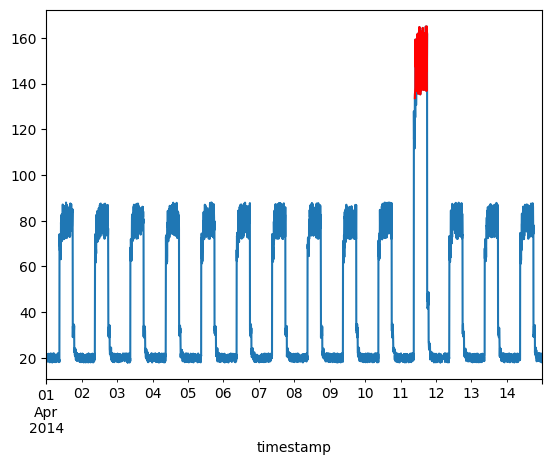

In [43]:
df_subset = df_daily_jumpsup.loc[iqr_outlier(df_daily_jumpsup, column="value", weight=1)]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

# 시계열 데이터 시각화

https://seaborn.pydata.org/generated/seaborn.lineplot.html